# Lab 2.02 - Android Persistence

Import all necessary Python libraries and load the Android Persistence dataset from lab exercise 1.02.  Do not forget the conversion to categorical variables. Define an order in case of an ordinal variable.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.api.types import CategoricalDtype

%matplotlib inline

df = pd.read_csv('../data/android_persistence_cpu.csv', sep=";")

embarked_type = CategoricalDtype(categories=['Small', 'Medium', 'Large'], ordered=True)

df['PersistenceType'] = df['PersistenceType'].astype('category')
df['DataSize'] = df['DataSize'].astype(embarked_type)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Time             300 non-null    float64 
 1   PersistenceType  300 non-null    category
 2   DataSize         300 non-null    category
dtypes: category(2), float64(1)
memory usage: 3.4 KB


Visualise the variables `DataSize` and `PersistenceType` separately using a suitable chart type.

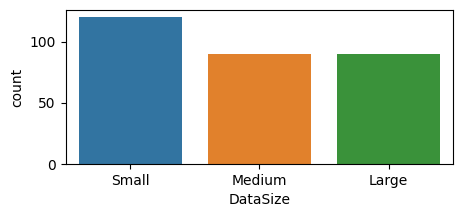

In [13]:
dsplt = sns.countplot(x='DataSize', data=df)
dsplt.figure.set_size_inches(5, 2)

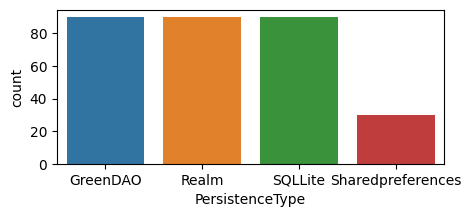

In [14]:
ptplt = sns.countplot(x='PersistenceType', data=df)
ptplt.figure.set_size_inches(5, 2)

How often does each combination of `DataSize` and `PersistenceType` occur? Show the frequencies of `PersistenceType` (parameter `hue`), grouped according to `DataSize` (parameter `x`). Try it the other way round too!

<Axes: xlabel='DataSize', ylabel='count'>

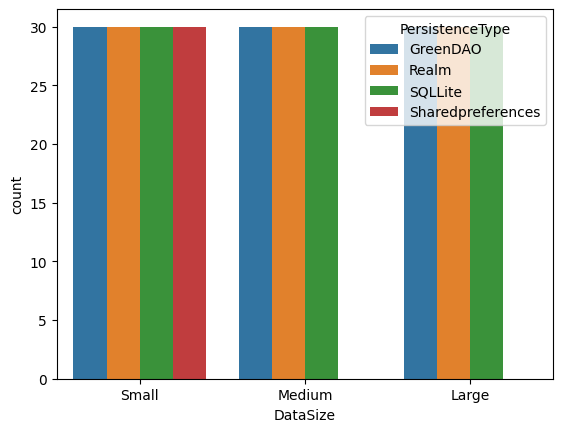

In [16]:
sns.countplot(x='DataSize', hue='PersistenceType', data=df)

<Axes: xlabel='PersistenceType', ylabel='count'>

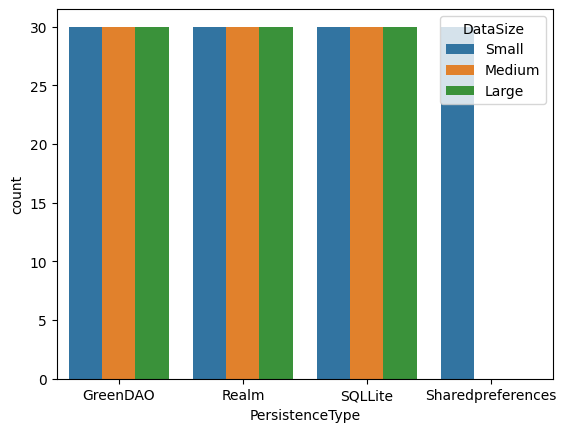

In [17]:
sns.countplot(x='PersistenceType', hue='DataSize', data=df)

Visualise the variable `Time` with a boxplot, each time with more detail. Do you notice how you get a better view of the data each time you do this?

- First over the entire dataset (parameter `x`)
- Then grouped according to `DataSize` (parameter `y`)
- Finally, split it according to `PersistenceType` (parameter `hue`)

<Axes: xlabel='Time'>

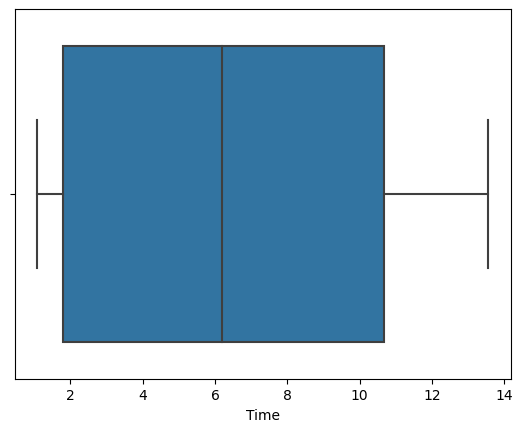

In [18]:
sns.boxplot(x='Time', data=df)

<Axes: xlabel='Time', ylabel='DataSize'>

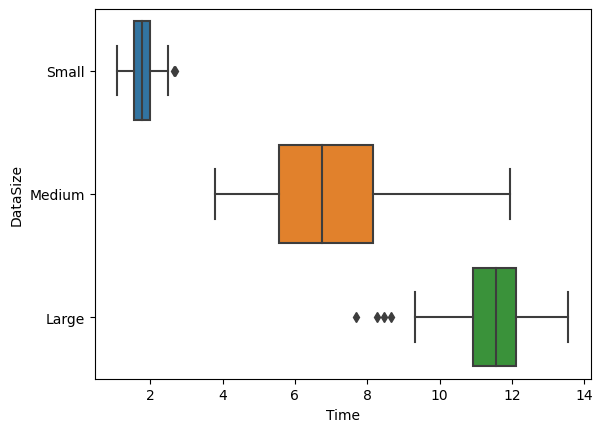

In [19]:
sns.boxplot(x='Time', y='DataSize', data=df)

<Axes: xlabel='Time', ylabel='DataSize'>

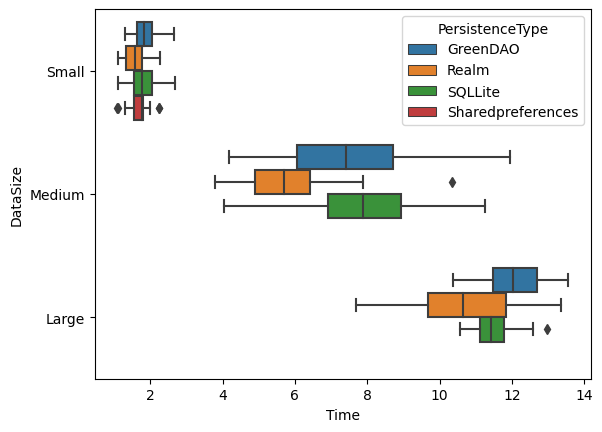

In [21]:
sns.boxplot(x='Time', y='DataSize', hue='PersistenceType', data=df)

**(Challenge)** Try to do something similar with a density graph: for each value of `DataSize`, show a scatter diagram showing a density graph of the variable `Time` for each value of `PersistenceType` (tip: `sns.FacetGrid()`). The result may look something like this:

![Density graphs for each `DataSize`, comparing the performance of different `PersistenceTypes`](img/persistence-density.png)

Calculate sample mean and standard deviation of `Time`.

- Across the whole dataset
- Broken down according to `DataSize`
- Broken down according to `PersistenceType`
- Broken down according to `DataSize` and `PersistenceType`

In [30]:
print(df.Time.mean())
print(df.Time.std())

6.230833333333333
4.229598639871586


In [33]:
for ds in df.DataSize.unique():
    print(ds)
    print(df[df.DataSize == ds].Time.mean())
    print(df[df.DataSize == ds].Time.std())
    print("\n")

Small
1.7413333333333332
0.35862466822719324


Medium
7.021999999999999
1.8643348062145173


Large
11.425666666666666
1.1637850394198785




In [34]:
for ds in df.PersistenceType.unique():
    print(ds)
    print(df[df.PersistenceType == ds].Time.mean())
    print(df[df.PersistenceType == ds].Time.std())
    print("\n")

Sharedpreferences
1.6736666666666666
0.2851918088166137


GreenDAO
7.152666666666666
4.385917146217327


SQLLite
7.036000000000002
4.146336354969207


Realm
6.022888888888888
3.8841753985680727




In [37]:
for ds in df.DataSize.unique():
    for pt in df.PersistenceType.unique():
        print(ds + " / " + pt)
        print(df[(df.DataSize == ds) & (df.PersistenceType == pt)].Time.mean())
        print(df[(df.DataSize == ds) & (df.PersistenceType == pt)].Time.std())
        print("\n")

Small / Sharedpreferences
1.6736666666666666
0.2851918088166137


Small / GreenDAO
1.893666666666667
0.34790489518251105


Small / SQLLite
1.799
0.4159604589961357


Small / Realm
1.5989999999999998
0.314986042383709


Medium / Sharedpreferences
nan
nan


Medium / GreenDAO
7.4540000000000015
2.0073581884037845


Medium / SQLLite
7.794
1.5990074507600667


Medium / Realm
5.818000000000001
1.3309509175125829


Large / Sharedpreferences
nan
nan


Large / GreenDAO
12.110333333333333
0.868460720463802


Large / SQLLite
11.514999999999995
0.5591418918060189


Large / Realm
10.651666666666667
1.405989854609331




## Expected results

As a check, you can find the expected results here (max. 3 decimal places):

| Statistic         | Mean   | Standard deviation |
| :---------------- | :----- | :----------------- |
| Whole dataset     | 6.231  | 4.230              |
| Small             | 1.741  | 0.359              |
| Medium            | 7.022  | 1.864              |
| Large             | 11.426 | 1.164              |
| GreenDAO          | 7.152  | 4.386              |
| Realm             | 6.023  | 3.884              |
| SQLite            | 7.036  | 4.146              |
| SharedPreferences | 1.674  | 0.285              |

Split on both criteria:

| Sample mean       | Small | Medium | Large  |
| :---------------- | :---- | :----- | :----- |
| GreenDAO          | 1.894 | 7.454  | 12.110 |
| Realm             | 1.599 | 5.818  | 10.652 |
| SQLite            | 1.799 | 7.794  | 11.515 |
| SharedPreferences | 1.674 | -      | -      |

| Standard deviation | Small | Medium | Large |
| :----------------- | :---- | :----- | :---- |
| GreenDAO           | 0.348 | 2.007  | 0.868 |
| Realm              | 0.315 | 1.331  | 1.406 |
| SQLite             | 0.416 | 1.599  | 0.559 |
| SharedPreferences  | 0.285 | -      | -     |
